In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot
import tensorflow as tf
import pickle
import os

In [41]:
import dataset_utils
from glob import glob

In [42]:
DATA_DIR = "2_class_data"
NUM_POINTS = 100
NUM_CLASSES = 2
BATCH_SIZE = 32
train_points, test_points, train_labels, test_labels, CLASS_MAP = dataset_utils.parse_dataset(NUM_POINTS, DATA_DIR)

processing class: standing
processing class: sitting


In [43]:
print(train_points)

[[[ 9.3604e-01  5.3516e-01  5.5176e-01  5.0098e-01  3.3100e+02]
  [ 5.3906e-01  1.5112e-01  5.5518e-01 -3.7573e-01  2.3300e+02]
  [ 1.0000e+00  5.7275e-01  4.2023e-02 -3.7573e-01  1.1500e+02]
  ...
  [ 9.3604e-01  1.0101e-02  8.3350e-01 -3.7573e-01  2.8600e+02]
  [ 6.3037e-01  5.3467e-01  5.1270e-01  5.0098e-01  2.2600e+02]
  [ 2.1082e-01  7.5830e-01  4.7095e-01 -7.5146e-01  2.1700e+02]]

 [[ 6.2744e-01  7.6270e-01  2.2522e-01  2.5049e-01  1.5400e+02]
  [ 4.7949e-01  1.0000e+00  8.1543e-01  7.5146e-01  3.2000e+02]
  [ 5.3906e-01  5.6592e-01  6.8726e-02 -3.7573e-01  2.5400e+02]
  ...
  [ 2.3450e-01  9.5703e-01  3.6377e-01  3.7573e-01  2.8000e+02]
  [ 1.0000e+00  1.0297e-01  5.0391e-01 -6.2598e-01  1.2500e+02]
  [ 4.2358e-01  1.0000e+00  3.5767e-01  5.0098e-01  3.0700e+02]]

 [[ 5.7129e-01  4.3408e-01  3.3789e-01 -3.7573e-01  2.7900e+02]
  [ 6.6016e-01  9.2578e-01  0.0000e+00 -5.0098e-01  2.0500e+02]
  [ 7.5098e-01  2.0056e-01  2.2131e-01 -2.5049e-01  1.7300e+02]
  ...
  [ 8.6963e-01  3.

In [44]:
print(test_points)

[[[ 3.887e-01  5.879e-01  5.264e-01  6.260e-01  3.630e+02]
  [ 5.952e-01  1.904e-02  8.281e-01 -8.765e-01  3.470e+02]
  [ 3.694e-01  4.902e-01  8.398e-01 -7.515e-01  3.170e+02]
  ...
  [ 0.000e+00  3.586e-01  5.215e-01  7.515e-01  3.700e+02]
  [ 5.767e-01  5.596e-01  9.893e-01  6.260e-01  3.050e+02]
  [ 1.787e-01  0.000e+00  1.277e-01  7.515e-01  3.560e+02]]

 [[ 6.914e-01  4.871e-01  7.012e-01  5.010e-01  2.940e+02]
  [ 5.439e-01  8.429e-02  7.949e-01  7.515e-01  2.100e+02]
  [ 5.767e-01  5.093e-01  9.893e-01  6.260e-01  3.050e+02]
  ...
  [ 6.333e-01  6.685e-01  1.000e+00  5.010e-01  3.150e+02]
  [ 8.057e-01  9.453e-01  8.662e-01  5.010e-01  2.700e+02]
  [ 4.055e-01  8.267e-01  0.000e+00 -5.010e-01  3.350e+02]]

 [[ 2.874e-01  9.521e-01  5.205e-01  7.515e-01  3.100e+02]
  [ 0.000e+00  2.849e-01  7.437e-01  7.515e-01  3.700e+02]
  [ 1.000e+00  3.162e-01  4.807e-01  6.260e-01  2.910e+02]
  ...
  [ 9.219e-01  1.471e-01  5.317e-01  6.260e-01  2.910e+02]
  [ 7.329e-01  4.084e-01  4.041e-0

In [45]:
train_points = train_points[:, :, :3]
test_points = test_points[:, :, :3]
print(CLASS_MAP)

{0: 'standing', 1: 'sitting'}


In [46]:
print(train_points)

[[[0.936   0.535   0.552  ]
  [0.539   0.1511  0.555  ]
  [1.      0.5728  0.04202]
  ...
  [0.936   0.0101  0.8335 ]
  [0.6304  0.5347  0.5127 ]
  [0.2108  0.7583  0.471  ]]

 [[0.6274  0.7627  0.2252 ]
  [0.4795  1.      0.8154 ]
  [0.539   0.566   0.0687 ]
  ...
  [0.2345  0.957   0.3638 ]
  [1.      0.10297 0.504  ]
  [0.4236  1.      0.3577 ]]

 [[0.5713  0.434   0.338  ]
  [0.66    0.926   0.     ]
  [0.751   0.2006  0.2213 ]
  ...
  [0.8696  0.3738  0.96   ]
  [0.936   0.4028  0.8335 ]
  [0.8696  0.3738  0.96   ]]

 ...

 [[0.3342  0.5537  0.97   ]
  [0.      1.      0.     ]
  [0.214   0.581   0.28   ]
  ...
  [0.675   0.2893  0.5024 ]
  [0.4958  0.742   0.4814 ]
  [0.3352  0.64    0.2177 ]]

 [[0.1425  0.668   0.811  ]
  [0.759   0.0274  0.816  ]
  [0.3535  0.3445  0.8345 ]
  ...
  [0.5312  0.699   0.0532 ]
  [1.      0.432   0.7383 ]
  [0.8726  0.4856  0.8906 ]]

 [[0.      0.6143  0.265  ]
  [0.4648  0.542   0.4124 ]
  [0.3533  0.57    0.3892 ]
  ...
  [0.      0.8335  0.113

In [47]:
from tensorflow import data as tf_data
import keras
import PointNET

keras.utils.set_random_seed(seed=42)

In [48]:
train_size = 0.8
dataset = tf_data.Dataset.from_tensor_slices((train_points, train_labels))
test_dataset = tf_data.Dataset.from_tensor_slices((test_points, test_labels))
train_dataset_size = int(len(dataset) * train_size)

dataset = dataset.shuffle(len(train_points)).map(PointNET.augment)
test_dataset = test_dataset.shuffle(len(test_points)).batch(BATCH_SIZE)

train_dataset = dataset.take(train_dataset_size).batch(BATCH_SIZE)
validation_dataset = dataset.skip(train_dataset_size).batch(BATCH_SIZE)

In [49]:
import keras
import tensorflow as tf
from keras import ops
from keras import layers
from PointNET import tnet, conv_bn, dense_bn

In [50]:
inputs = keras.Input(shape=(NUM_POINTS, 3))

x = tnet(inputs, 3)
x = conv_bn(x, 32)
x = conv_bn(x, 32)
x = tnet(x, 32)
x = conv_bn(x, 32)
x = conv_bn(x, 64)
x = conv_bn(x, 512)
x = layers.GlobalMaxPooling1D()(x)
x = dense_bn(x, 256)
x = layers.Dropout(0.3)(x)
x = dense_bn(x, 128)
x = layers.Dropout(0.3)(x)

outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="pointnet")
model.summary()

Model: "pointnet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 100, 3)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_33 (Conv1D)  │ (None, 100, 32)   │        128 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 100, 32)   │        128 │ conv1d_33[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_51       │ (None, 100, 32)   │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_34 (Conv1D)  │ (None, 100, 64)   │      2,112 │ activation_51[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 100, 64)   │        256 │ conv1d_34[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_52       │ (None, 100, 64)   │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_35 (Conv1D)  │ (None, 100, 512)  │     33,280 │ activation_52[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 100, 512)  │      2,048 │ conv1d_35[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_53       │ (None, 100, 512)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 512)       │          0 │ activation_53[0]… │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_27 (Dense)    │ (None, 256)       │    131,328 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_27[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_54       │ (None, 256)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_28 (Dense)    │ (None, 128)       │     32,896 │ activation_54[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_28[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_55       │ (None, 128)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_29 (Dense)    │ (None, 9)         │      1,161 │ activation_55[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_6 (Reshape) │ (None, 3, 3)      │          0 │ dense_29[0][0]  

 Total params: 747,947 (2.85 MB)

 Trainable params: 741,867 (2.83 MB)

 Non-trainable params: 6,080 (23.75 KB)

In [51]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["sparse_categorical_accuracy"],
)

model.fit(train_dataset, epochs=30, validation_data=validation_dataset)

Epoch 1/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: 48.5207 - sparse_categorical_accuracy: 0.5601 - val_loss: 36.2532 - val_sparse_categorical_accuracy: 0.5516
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 35.2597 - sparse_categorical_accuracy: 0.5717 - val_loss: 35.7831 - val_sparse_categorical_accuracy: 0.6323
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 34.9946 - sparse_categorical_accuracy: 0.5803 - val_loss: 35.0797 - val_sparse_categorical_accuracy: 0.6726
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 34.9845 - sparse_categorical_accuracy: 0.6203 - val_loss: 34.8870 - val_sparse_categorical_accuracy: 0.6682
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 34.9242 - sparse_categorical_accuracy: 0.6586 - val_loss: 36.0408 - val_sparse_categorical_accuracy: 0.7265
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 34.7954 - sparse_categorical_accuracy: 0.7030 - val_loss: 34.3823 - val_sparse_categorical_accuracy: 0.766

In [52]:
from matplotlib import pyplot as plt

2024-08-10 15:11:18.649517: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
[[[1.      0.651   0.864  ]
  [0.6006  0.5117  0.979  ]
  [0.3818  0.1306  0.7646 ]
  ...
  [0.7964  0.3953  0.0964 ]
  [0.6343  0.8193  0.261  ]
  [0.6533  0.1132  0.1503 ]]

 [[1.      0.      0.782  ]
  [0.3547  0.563   0.2307 ]
  [0.6567  0.914   0.6196 ]
  ...
  [0.6387  0.7397  0.6436 ]
  [0.531   0.1698  0.3018 ]
  [0.3706  0.634   0.646  ]]

 [[0.6777  1.      0.4229 ]
  [0.5215  0.5405  0.623  ]
  [0.1884  0.4172  0.6934 ]
  ...
  [0.981   0.8877  0.4402 ]
  [0.1499  0.1687  0.8354 ]
  [0.794   0.6934  0.2617 ]]

 ...

 [[0.293   0.2288  0.9014 ]
  [0.      0.9033  0.     ]
  [0.3752  0.      0.3315 ]
  ...
  [0.      0.408   0.5903 ]
  [0.923   0.0725  1.     ]
  [1.      0.2421  1.     ]]

 [[0.5874  0.932   0.507  ]
  [0.6436  0.      0.9727 ]
  [0.7637  0.354   0.635  ]
  ...
  [0.3208  0.336   0.6616 ]
  [0.2222  0.816   0.7104 ]
  [0.5444  0.4714  0.1284 ]]

 [[0.1498  0.7764  0.11176]
  [0.6313  0.5093  0.5493 ]
  [0.0781  0.4558  

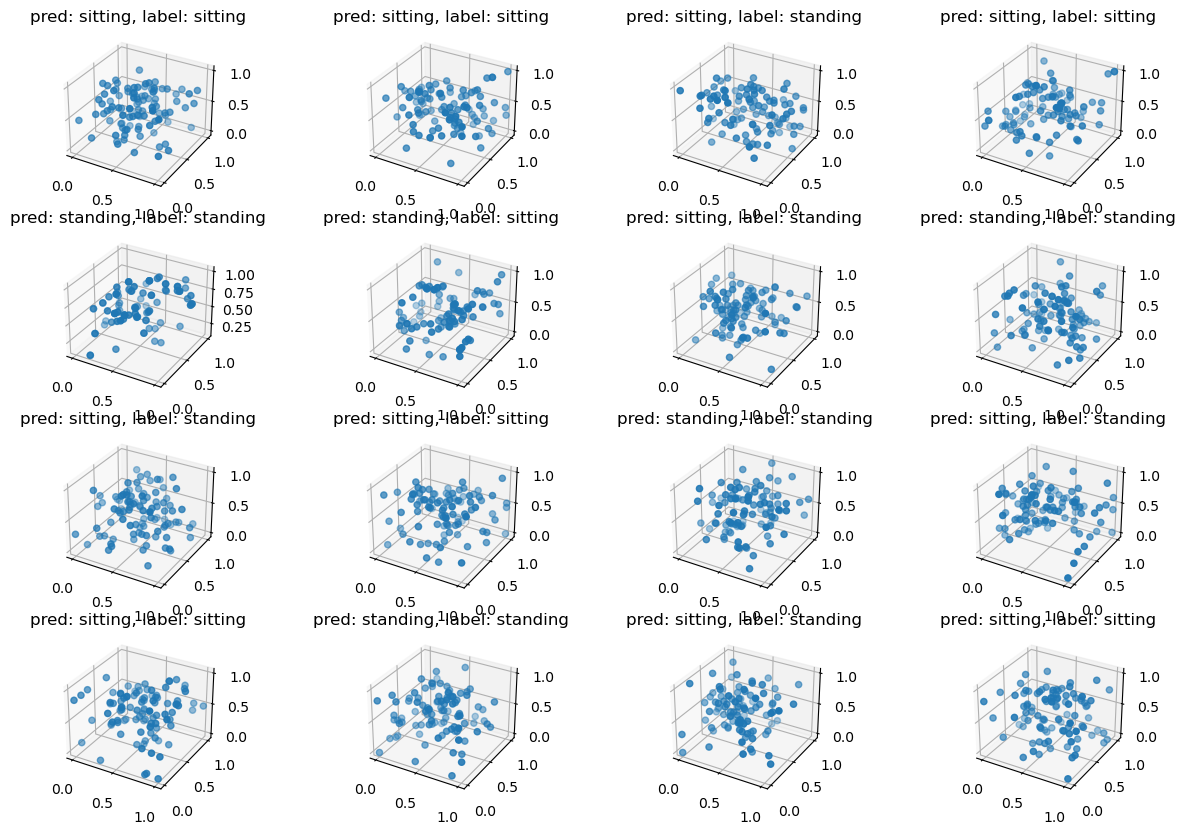

In [53]:
data = test_dataset.take(1)

points, labels = list(data)[0]
points = points[:20, ...]
labels = labels[:20, ...]

# run test data through model
preds = model.predict(points)
preds = ops.argmax(preds, -1)

points = points.numpy()
print(points)

# plot points with predicted class and label
fig = plt.figure(figsize=(15, 10))
for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, projection="3d")
    ax.scatter(points[i, :, 0], points[i, :, 1], points[i, :, 2])
    ax.set_title(
        "pred: {:}, label: {:}".format(
            CLASS_MAP[preds[i].numpy()], CLASS_MAP[labels.numpy()[i]]
        )
    )
    ax.set_axis_on()
plt.show()

In [54]:
predictions = []

for batch in np.array_split(test_points, len(test_points)//NUM_POINTS): 
    preds = model.predict(batch)
    preds = np.argmax(preds, axis=-1)
    predictions.extend(preds)

predictions = np.array(predictions)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [55]:
accuracy = np.sum(predictions == test_labels) / len(test_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 73.93%


In [56]:
model.save('pointnet_2_class_data.h5', save_format='h5')
# model.get_config()

NotImplementedError: <PointNET.OrthogonalRegularizer object at 0x311d5b3d0> does not implement get_config()